># The main imports

In [1]:
import pandas as pd

data_set = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vQOq4Oo7g71f4yQvTWmjwjHvN1vlhCCjY-YMV9FmFlrGE1ZUguFK4RUh2bXuDSMFZ7Q_b8Juv0K0YIm/pub?gid=1437043369&single=true&output=csv")

In [2]:
s = "-"*50

columns = data_set.columns
dt = data_set.dtypes
dsample = data_set.head()
shape = data_set.shape
print(dsample, dt, columns, shape, sep="\n"+"-"*140+"\n")

   ACT composite score  SAT total score parental level of education   
0                   22             1625                 high school  \
1                   29             2090          associate's degree   
2                   30             2188           bachelor's degree   
3                   33             2151          associate's degree   
4                   29             2050          associate's degree   

   parental income high school gpa  college gpa  years to graduate  
0            40999        dfadfafd          3.1                NaN  
1            75817               4          3.4                5.0  
2            82888               4          3.9                3.0  
3            93518               4          3.7                5.0  
4            79153       dfafdffff          3.4                6.0  
--------------------------------------------------------------------------------------------------------------------------------------------
ACT composite scor

># data cleaning

In [3]:
print(f"{data_set.isna().sum()}\n{s}\n{data_set.duplicated().sum()}")

HighSchoolGPA = data_set["high school gpa"]

for i in range(len(HighSchoolGPA)):
    value = HighSchoolGPA.values
    if not str(value[i]).isnumeric():
        data_set.drop(i, axis="index", inplace=True)

data_set["high school gpa"] = pd.to_numeric(data_set["high school gpa"])

data_set.dropna(inplace=True)
data_set.drop_duplicates(inplace=True)

ACT composite score            0
SAT total score                0
parental level of education    0
parental income                0
high school gpa                0
college gpa                    0
years to graduate              2
dtype: int64
--------------------------------------------------
2


># ploting    

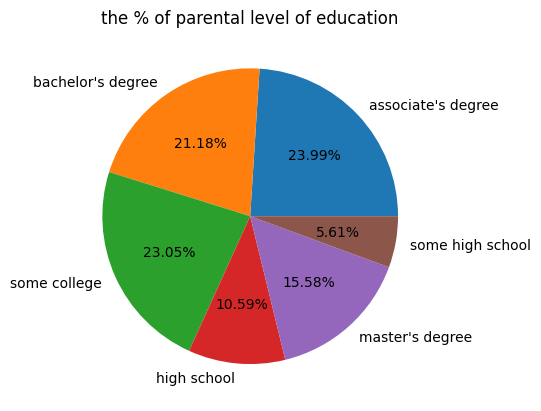

In [4]:
import matplotlib.pyplot as plt

uin_edu_level = list(data_set["parental level of education"].unique())
values =  list(data_set["parental level of education"].values)

nuni =[]
for i in uin_edu_level:
    n = values.count(i)
    nuni.append(n)

plt.pie(x=nuni, labels=uin_edu_level,autopct='%1.2f%%')
plt.title("the % of parental level of education")
plt.show()

># Data encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

dataType = data_set.dtypes

for i in range(data_set.shape[1]):
    if dataType[i] == "object":
        enc = LabelEncoder()
        data_set[columns[i]] = enc.fit_transform(data_set[columns[i]])

data_set

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
1,29,2090,0,75817,4,3.4,5.0
2,30,2188,1,82888,4,3.9,3.0
3,33,2151,0,93518,4,3.7,5.0
6,29,2097,4,46883,4,3.4,6.0
9,32,2246,1,56793,4,3.6,3.0
...,...,...,...,...,...,...,...
993,34,2242,2,89887,4,3.8,4.0
994,33,2171,0,59147,4,3.4,5.0
995,32,2234,4,30658,4,3.0,10.0
997,32,2117,0,94415,4,3.8,4.0


> # data scaling teqneqs

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mmsv= MinMaxScaler()

mmsd= mmsv.fit_transform(data_set)
mmsddf = pd.DataFrame(mmsd,columns=columns)

ssv = StandardScaler()

ssd = ssv.fit_transform(data_set)
ssddf = pd.DataFrame(ssd,columns=columns)

print(mmsd,ssd,sep="\n"+s+"\n")

[[0.5625     0.61387435 0.         ... 1.         0.57142857 0.28571429]
 [0.625      0.7421466  0.2        ... 1.         0.92857143 0.        ]
 [0.8125     0.69371728 0.         ... 1.         0.78571429 0.28571429]
 ...
 [0.75       0.80235602 0.8        ... 1.         0.28571429 1.        ]
 [0.75       0.64921466 0.         ... 1.         0.85714286 0.14285714]
 [0.875      0.84685864 0.2        ... 1.         0.85714286 0.42857143]]
--------------------------------------------------
[[-0.91308402 -0.44395015 -1.26351509 ...  0.19706586 -0.46471523
   0.09879088]
 [-0.49496709  0.3839953  -0.65996101 ...  0.19706586  1.66026466
  -1.34265792]
 [ 0.75938371  0.07140365 -1.26351509 ...  0.19706586  0.81027271
   0.09879088]
 ...
 [ 0.34126678  0.77262275  1.15070124 ...  0.19706586 -2.16469914
   3.70241288]
 [ 0.34126678 -0.21584273 -1.26351509 ...  0.19706586  1.23526869
  -0.62193352]
 [ 1.17750065  1.05986913 -0.65996101 ...  0.19706586  1.23526869
   0.81951528]]


># Data Coralation

In [7]:
corrData = mmsddf.corr()
corrData

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
ACT composite score,1.000000,0.840813,-0.107321,0.070412,0.722382,0.379469,-0.058122
SAT total score,0.840813,1.000000,-0.120320,0.142519,0.735132,0.380134,-0.067375
parental level of education,-0.107321,-0.120320,1.000000,-0.217013,-0.137559,-0.194022,-0.009334
parental income,0.070412,0.142519,-0.217013,1.000000,0.155670,0.453677,-0.207473
high school gpa,0.722382,0.735132,-0.137559,0.155670,1.000000,0.342836,-0.019468
college gpa,0.379469,0.380134,-0.194022,0.453677,0.342836,1.000000,-0.466507
years to graduate,-0.058122,-0.067375,-0.009334,-0.207473,-0.019468,-0.466507,1.000000


># heatmap & pairplot

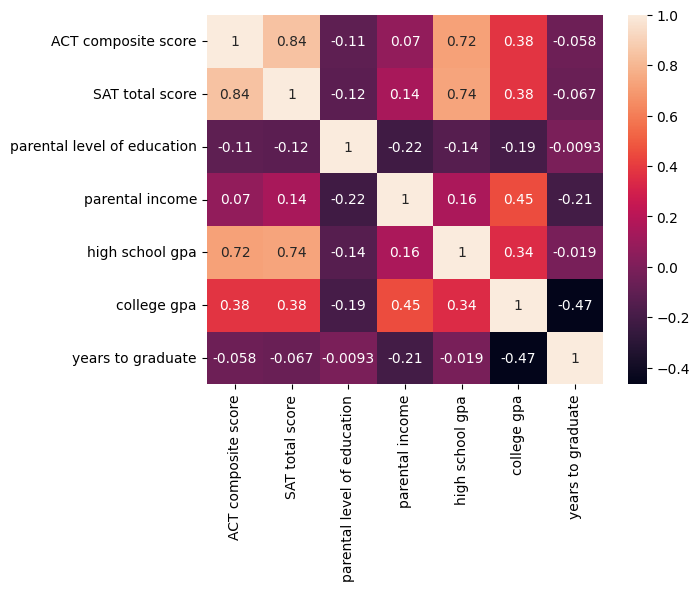

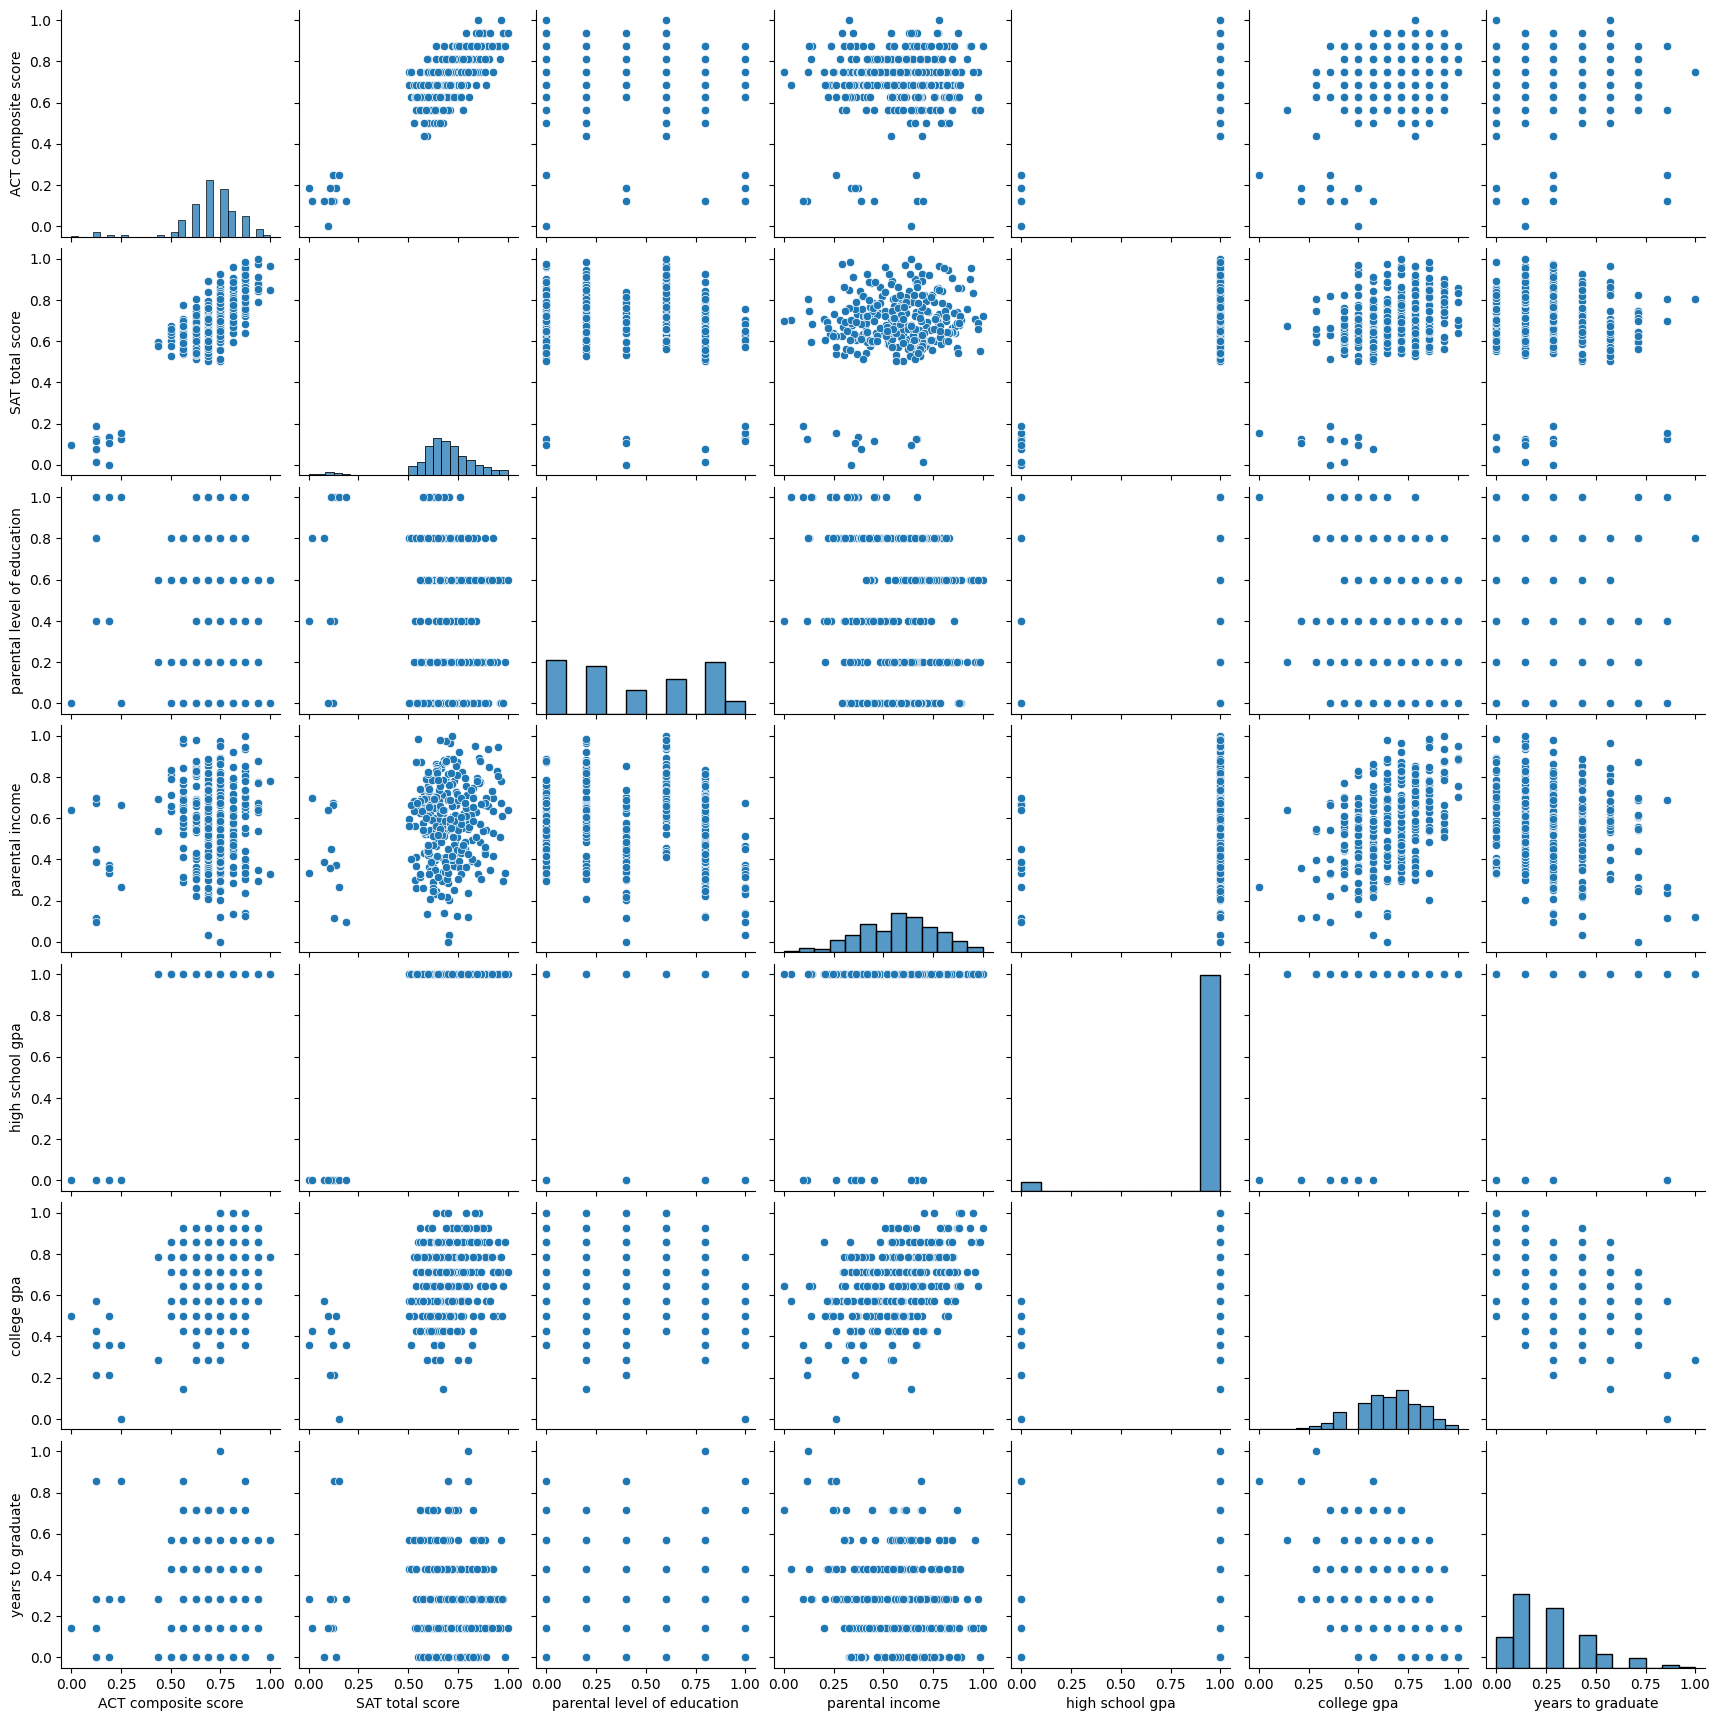

In [8]:
import seaborn as sns

sns.heatmap(corrData, annot=True)
plt.show()

sns.pairplot(mmsddf)
plt.show()

># Feature selection 

In [9]:
from sklearn.feature_selection import r_regression, SelectKBest

x = mmsddf.iloc[:,[0,1,2,4,5,6]]
y = mmsddf.iloc[:,3]

rr = r_regression(x,y)

best_featurs = SelectKBest(r_regression,k=3)
ss = best_featurs.fit_transform(x,y)

x = ss

x

array([[0.61387435, 1.        , 0.57142857],
       [0.7421466 , 1.        , 0.92857143],
       [0.69371728, 1.        , 0.78571429],
       [0.62303665, 1.        , 0.57142857],
       [0.81806283, 1.        , 0.71428571],
       [0.53403141, 1.        , 0.78571429],
       [0.64005236, 1.        , 0.64285714],
       [0.70026178, 1.        , 0.57142857],
       [0.80235602, 1.        , 0.92857143],
       [0.60078534, 1.        , 0.92857143],
       [0.62827225, 1.        , 0.71428571],
       [0.63874346, 1.        , 0.57142857],
       [0.65445026, 1.        , 0.35714286],
       [0.58507853, 1.        , 0.71428571],
       [0.85602094, 1.        , 1.        ],
       [0.66492147, 1.        , 0.57142857],
       [0.65706806, 1.        , 0.85714286],
       [0.79581152, 1.        , 0.64285714],
       [0.12565445, 0.        , 0.21428571],
       [0.76832461, 1.        , 0.92857143],
       [0.75      , 1.        , 0.42857143],
       [0.62172775, 1.        , 0.71428571],
       [0.

> # Cross_Validation

In [10]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(x,y, test_size = 0.25)

print(s)
print(f"x_train = \n{x_train}")
print(f"y_train = \n{y_train}")
print(s)
print(f"x_test = \n{x_test}")
print(f"y_test = \n{y_test}")

--------------------------------------------------
x_train = 
[[0.60471204 1.         0.42857143]
 [0.75       1.         0.42857143]
 [0.79712042 1.         0.71428571]
 [0.59947644 1.         0.71428571]
 [0.64136126 1.         0.5       ]
 [0.59947644 1.         0.71428571]
 [0.62827225 1.         0.5       ]
 [0.59947644 1.         0.78571429]
 [0.80235602 1.         0.57142857]
 [0.56020942 1.         0.92857143]
 [0.62434555 1.         0.5       ]
 [0.67408377 1.         0.57142857]
 [0.7552356  1.         0.71428571]
 [0.85994764 1.         0.92857143]
 [0.58376963 1.         0.85714286]
 [0.84685864 1.         0.85714286]
 [0.56282723 1.         0.71428571]
 [0.76308901 1.         0.57142857]
 [0.60078534 1.         0.92857143]
 [0.62434555 1.         0.5       ]
 [0.67146597 1.         0.57142857]
 [0.69502618 1.         0.57142857]
 [0.69764398 1.         0.71428571]
 [0.67277487 1.         0.71428571]
 [0.92801047 1.         0.71428571]
 [0.53403141 1.         0.78571429]
 [

> # model Accurce 

In [11]:
from sklearn.linear_model import LinearRegression as LR

model = LR()

model.fit(x_train,y_train)


LinearRegression()

In [12]:
model.score(x_test,y_test)

0.14754064713089132

In [13]:
a = model.coef_

b = model.intercept_

ypred = model.predict(x_test)

ypred

In [14]:
stander_error = sum(ypred-y_test)

f"Standard error = {stander_error}"

'Standard error = 0.8306846442691583'

In [15]:
from sklearn.metrics import mean_absolute_error

mean = mean_absolute_error(y_test,ypred)

f"mean absolute error = {mean}"

'mean absolute error = 0.15442365671836256'

In [16]:
from sklearn.metrics import mean_squared_error

MAE= mean_squared_error(y_test, ypred)

f"MAE = {MAE}"

'MAE = 0.03574064163479135'

In [17]:
error= mean_squared_error(y_test, ypred,squared=False)

f"root mean  = {error}"

'root mean  = 0.1890519548557786'

In [18]:
from sklearn.metrics import mean_squared_log_error
a = mean_squared_log_error(y_test,ypred)

f"MSLE = {a}"

'MSLE = 0.016230348394633394'

In [19]:
RMSLE= mean_squared_log_error(y_test,ypred, squared=False)

f"RMSLE = {RMSLE}"

'RMSLE = 0.12739838458408095'

In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,ypred)

f"R-Score = {r2}"

'R-Score = 0.14754064713089132'